In [3]:
import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.0f}'.format

In [4]:
file = 'Resources/reformed_data.csv'
df = pd.read_csv(file, encoding="iso-8859-1", low_memory=False)
df.head()

df['Total Percentage Delayed'] = df['Arrival_Delay']/df['arr_flights']* 100
df['Carrier Delay %'] = df['Carrier_Delay']/df['arr_flights']* 100
df['Weather Delay %'] = df['Weather_Delay']/df['arr_flights']* 100
df.head()

,Year,Month,carrier,carrier_name,airport,airport_name,arr_flights,Arrival_Delay,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,Cancelled,Diverted,Unnamed: 21,Total Percentage Delayed,Carrier Delay %,Weather Delay %
0,2010,1,9E,Pinnacle Airlines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",65,16,5,0,11,0,0,1,0,nan,25,8,0
1,2010,1,9E,Pinnacle Airlines Inc.,AEX,"Alexandria, LA: Alexandria International",60,17,5,0,8,0,4,4,0,nan,28,8,1
2,2010,1,9E,Pinnacle Airlines Inc.,ALB,"Albany, NY: Albany International",81,34,10,1,20,0,3,1,1,nan,42,12,2
3,2010,1,9E,Pinnacle Airlines Inc.,ALO,"Waterloo, IA: Waterloo Regional",3,1,0,0,1,0,0,0,0,nan,33,0,0
4,2010,1,9E,Pinnacle Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1067,271,43,9,156,0,63,46,4,nan,25,4,1


In [5]:
df['carrier_name'].unique()

array(['Pinnacle Airlines Inc.', 'American Airlines Inc.',
       'Alaska Airlines Inc.', 'JetBlue Airways',
       'Continental Air Lines Inc.', 'Delta Air Lines Inc.',
       'Atlantic Southeast Airlines', 'Frontier Airlines Inc.',
       'AirTran Airways Corporation', 'Hawaiian Airlines Inc.',
       'American Eagle Airlines Inc.', 'Comair Inc.',
       'SkyWest Airlines Inc.', 'United Air Lines Inc.', 'US Airways Inc.',
       'Southwest Airlines Co.', 'ExpressJet Airlines Inc.',
       'Mesa Airlines Inc.', 'Virgin America', 'Endeavor Air Inc.',
       'Envoy Air', 'Spirit Air Lines'], dtype=object)

In [6]:
Cdf = df[['carrier_name','Year','arr_flights','Arrival_Delay','Carrier_Delay','Weather_Delay','Total Percentage Delayed','Carrier Delay %','Weather Delay %']]


In [7]:
At.head()

NameError: name 'At' is not defined

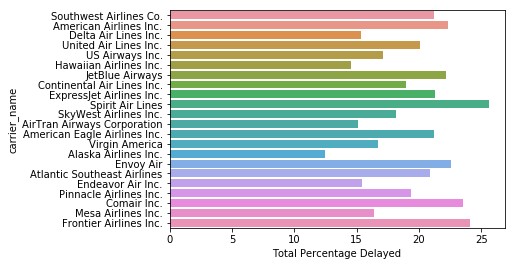

In [8]:
At = Cdf.groupby(['carrier_name']).mean().reset_index()
A= At.sort_values(by ='arr_flights',ascending=False).reset_index()
ax = sns.barplot(x="Total Percentage Delayed", y="carrier_name", data=A)
plt.show()


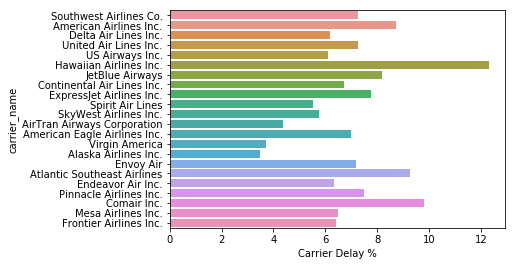

In [9]:
ax = sns.barplot(x="Carrier Delay %", y="carrier_name", data=A)
plt.show()

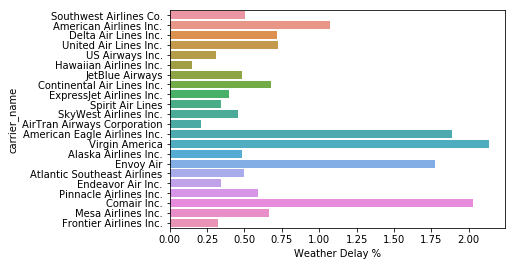

In [10]:
ax = sns.barplot(x="Weather Delay %", y="carrier_name", data=A)
plt.show()

In [13]:
A.head()

,index,carrier_name,Year,arr_flights,Arrival_Delay,Carrier_Delay,Weather_Delay,Total Percentage Delayed,Carrier Delay %,Weather Delay %
0,17,Southwest Airlines Co.,2013,1235,241,72,6,21,7,1
1,2,American Airlines Inc.,2013,624,122,38,5,22,9,1
2,7,Delta Air Lines Inc.,2013,503,76,24,3,15,6,1
3,20,United Air Lines Inc.,2013,496,95,30,3,20,7,1
4,19,US Airways Inc.,2012,449,74,22,1,17,6,0


In [19]:
Spirit = A['carrier_name'] == "Spirit Air Lines"
A[Spirit]

,index,carrier_name,Year,arr_flights,Arrival_Delay,Carrier_Delay,Weather_Delay,Total Percentage Delayed,Carrier Delay %,Weather Delay %
9,18,Spirit Air Lines,2016,316,83,16,1,26,6,0
